In [89]:
#Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import sem

In [90]:
#Load CSVs
city_df = pd.read_csv("raw_data/city_data.csv")
ride_df = pd.read_csv("raw_data/ride_data.csv")
city_df.head()


,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [91]:
#Merge CSVs
merged_csv = pd.merge(city_df, ride_df, on="city")
merged_csv.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [149]:
#Group by City Type
urban_df=merged_csv.loc[merged_csv['type']== 'Urban']
suburban_df=merged_csv.loc[merged_csv['type']== 'Suburban']
rural_df=merged_csv.loc[merged_csv['type']== 'Rural']

rural_df.head()

,city,driver_count,type,date,fare,ride_id
2282,South Elizabethmouth,3,Rural,2016-04-03 11:13:07,22.79,8193837300497
2283,South Elizabethmouth,3,Rural,2016-03-11 12:27:01,26.72,4943246873754
2284,South Elizabethmouth,3,Rural,2016-11-23 07:47:18,46.39,1939838068038
2285,South Elizabethmouth,3,Rural,2016-07-19 09:35:59,31.09,2959749591417
2286,South Elizabethmouth,3,Rural,2016-04-21 10:20:09,16.50,5702608059064


In [93]:
#Get total Fare sum by city type 
urban_fare_sum = urban_df['fare'].sum()
suburban_fare_sum = suburban_df['fare'].sum()
rural_fare_sum = rural_df['fare'].sum()
rural_fare_sum

4255.09

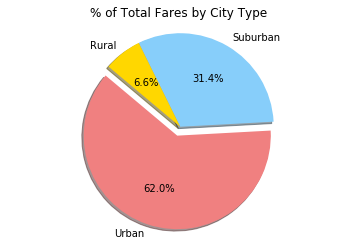

In [107]:
#Create Pie Chart for % of total Fares by city type 
city_type = ["Urban", "Suburban","Rural"]
fare_sums = [urban_fare_sum, suburban_fare_sum, rural_fare_sum]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)
plt.pie(fare_sums, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()

In [123]:
#Get Total Rides by city type
urban_ride_sum = urban_df['ride_id'].count()
suburban_ride_sum = suburban_df['ride_id'].count()
rural_ride_sum = rural_df['ride_id'].count()
rural_ride_sum

125

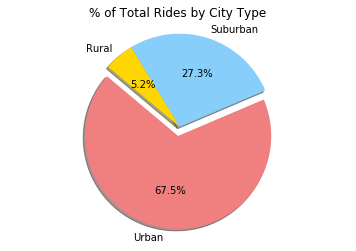

In [114]:
#Create Pie Chart for % of total rides by city type 
city_type = ["Urban", "Suburban","Rural"]
fare_sums = [urban_ride_sum, suburban_ride_sum, rural_ride_sum]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)
plt.pie(fare_sums, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.show()

In [148]:
#Get Total Driver Count by city type

urban_driver= urban_df.groupby('city').max()['driver_count']
suburban_driver= suburban_df.groupby('city').max()['driver_count']
rural_driver= rural_df.groupby('city').max()['driver_count']

urban_driver_total=urban_driver.sum()
suburban_driver_total=suburban_driver.sum()
rural_driver_total=rural_driver.sum()

rural_driver_total

104

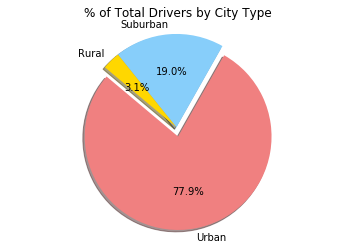

In [151]:
#Create Pie Chart for % of total drivers by city type 
#Create Pie Chart for % of total rides by city type 
city_type = ["Urban", "Suburban","Rural"]
fare_sums = [urban_driver_total, suburban_driver_total, rural_driver_total]
colors = ["lightcoral","lightskyblue","gold"]
explode = (0.1,0,0)
plt.pie(fare_sums, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()

In [95]:
# Using GroupBy in order to separate the data into fields according to "type" values
urban_city_df = urban_df.groupby(['city'])
suburban_city_df = suburban_df.groupby(['city'])
rural_city_df = suburban_df.groupby(['city'])
urban_city_df.mean().head(10)

,driver_count,fare,ride_id
city,,,
Alvarezhaven,21.0,23.928710,5.351586e+12
Alyssaberg,67.0,20.609615,3.536678e+12
Antoniomouth,21.0,23.625000,5.086800e+12
Aprilchester,49.0,21.981579,4.574788e+12
Arnoldview,41.0,25.106452,5.021952e+12
Carrollfort,55.0,25.395517,4.759008e+12
Davidtown,73.0,22.978095,5.850005e+12
Davistown,25.0,21.497200,4.361977e+12
East Douglas,12.0,26.169091,4.732315e+12


In [102]:
#Get Rider count by city Type
urban_rider_count= urban_df.groupby('city').count()['ride_id']
suburban_rider_count= suburban_df.groupby('city').count()['ride_id']
rural_rider_count= rural_df.groupby('city').count()['ride_id']
suburban_rider_count.head()

city
Anitamouth       9
Campbellport    15
Carrollbury     10
Clarkstad       12
Conwaymouth     11
Name: ride_id, dtype: int64

In [106]:
#Get Average Fare by city type 
urban_avg_fare= urban_df.groupby('city').mean()['fare']
suburban_avg_fare=suburban_df.groupby('city').mean()['fare']
rural_avg_fare=rural_df.groupby('city').mean()['fare']
suburban_avg_fare.head()

city
Anitamouth      37.315556
Campbellport    33.711333
Carrollbury     36.606000
Clarkstad       31.051667
Conwaymouth     34.591818
Name: fare, dtype: float64

In [105]:
#Get Driver Count by city type 
urban_driver_count= urban_df.groupby('city').max()['driver_count']
suburban_driver_count= suburban_df.groupby('city').max()['driver_count']
rural_driver_count= rural_df.groupby('city').max()['driver_count']
rural_driver_count.head()

city
East Leslie        9
East Stephen       6
East Troybury      3
Erikport           3
Hernandezshire    10
Name: driver_count, dtype: int64

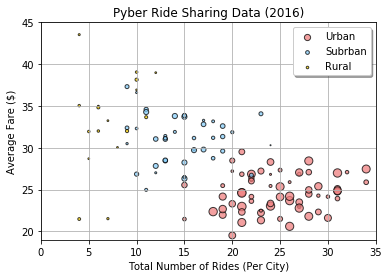

In [188]:
#Plot Bubble Plot
x_limit=35
y_limit =45
plt.scatter(urban_rider_count, urban_avg_fare, marker="o", c ="lightcoral", edgecolors="black",
            label='Urban',
            s=urban_driver_count, alpha=0.75)

plt.scatter(suburban_rider_count, suburban_avg_fare, marker="o", c ="lightskyblue", edgecolors="black",
            label='Subrban',
            s=suburban_driver_count, alpha=0.75)

plt.scatter(rural_rider_count, rural_avg_fare, marker="o", c ="gold", edgecolors="black",
            label='Rural',
            s=rural_driver_count, alpha=0.75)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.xlim(0, x_limit)
plt.ylim(19, y_limit)
# Now add the legend with some customizations.
legend = plt.legend(loc='best', shadow=True)

plt.show()

In [ ]:
# My Observations
#1. Urban cities had lower fare prices probably because there is more driver density making the prices to be competitive.
#2. The larger the driver count per city, the more total number of rides per city, on average. 
#3. Rural Average fares are about $10 higher the urban avg fares. 